In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('processed_data.csv')

In [3]:
df

,TransactionId,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,Amount,Value,TransactionStartTime,PricingStrategy,...,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,Stability,RFMS_Score,Default
0,TransactionId_76871,AccountId_3957,CustomerId_4406,ProviderId_6,ProductId_10,airtime,0.092004,0.000101,2018-11-15 02:18:49+00:00,0.5,...,0.086957,0.466667,0.909091,0.0,90,119,10.947603,0.000280,54.986971,0
1,TransactionId_73770,AccountId_4841,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,0.091910,0.000002,2018-11-15 02:19:08+00:00,0.5,...,0.086957,0.466667,0.909091,0.0,90,119,10.947603,0.000280,54.986971,0
2,TransactionId_26203,AccountId_4229,CustomerId_4683,ProviderId_6,ProductId_1,airtime,0.091958,0.000050,2018-11-15 02:44:21+00:00,0.5,...,0.086957,0.466667,0.909091,0.0,90,2,0.183915,0.000000,23.045979,0
3,TransactionId_380,AccountId_648,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,0.093750,0.002206,2018-11-15 03:32:55+00:00,0.5,...,0.130435,0.466667,0.909091,0.0,90,38,3.513670,0.001578,32.878812,0
4,TransactionId_28195,AccountId_4841,CustomerId_988,ProviderId_4,ProductId_6,financial_services,0.091853,0.000065,2018-11-15 03:34:21+00:00,0.5,...,0.130435,0.466667,0.909091,0.0,90,38,3.513670,0.001578,32.878812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,AccountId_4841,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,0.091820,0.000101,2019-02-13 09:54:09+00:00,0.5,...,0.391304,0.400000,0.090909,1.0,0,573,52.889535,0.002073,156.472902,1
95658,TransactionId_91597,AccountId_3439,CustomerId_3874,ProviderId_6,ProductId_10,airtime,0.092004,0.000101,2019-02-13 09:54:25+00:00,0.5,...,0.391304,0.400000,0.090909,1.0,0,43,3.957583,0.000209,11.739448,0
95659,TransactionId_82501,AccountId_4841,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,0.091910,0.000002,2019-02-13 09:54:35+00:00,0.5,...,0.391304,0.400000,0.090909,1.0,0,43,3.957583,0.000209,11.739448,0
95660,TransactionId_136354,AccountId_1346,CustomerId_1709,ProviderId_6,ProductId_19,tv,0.092188,0.000303,2019-02-13 10:01:10+00:00,0.5,...,0.434783,0.400000,0.090909,1.0,0,524,48.240072,0.000295,143.060092,1


In [4]:
# drop 'AccountId', 'CustomerId'
df = df.drop(['AccountId', 'CustomerId'], axis=1)
# drop 'ProviderId'
df = df.drop('ProviderId', axis=1)
# drop TransactionStartTime
df = df.drop('TransactionStartTime', axis=1)
# drop TransactionId
df = df.drop('TransactionId', axis=1)

In [5]:
# onehote encode ProductId, productcategory
df = pd.get_dummies(df, columns=['ProductId', 'ProductCategory'], drop_first=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+03, tolerance: 1.785e+00
  model = cd_fast.enet_coordinate_descent(


[-0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.00057058 -0.0003424   0.00936383 -0.
 -0.00071414 -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.        ]


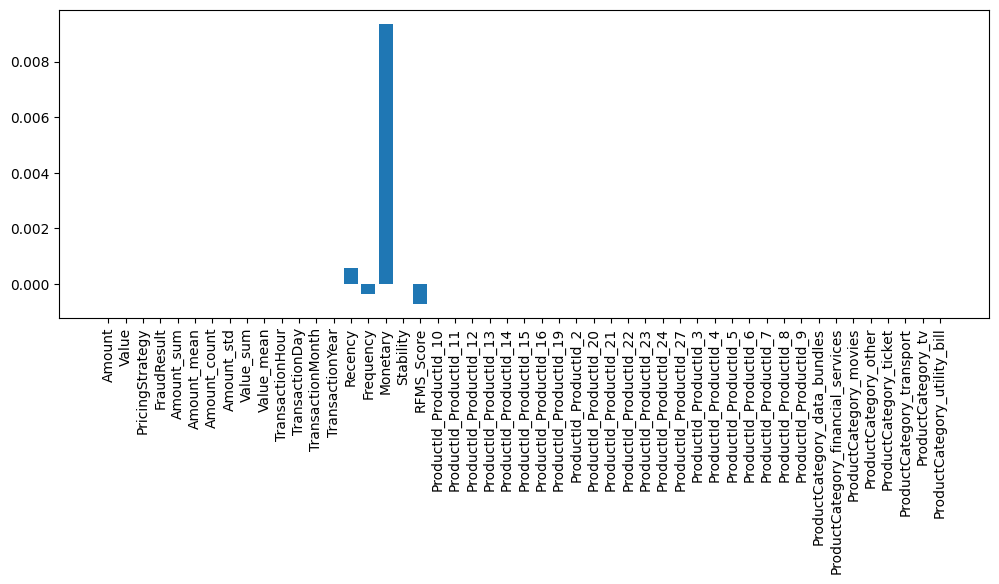

In [7]:
# useing lasso for feature selction
from sklearn.linear_model import Lasso
X = df.drop("Default", axis=1).values
y= df['Default'].values
names = df.drop('Default', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef= lasso.fit(X, y).coef_
# Compute and print the coefficients
print(lasso_coef)
plt.figure(figsize=(12, 4))
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [8]:
# drop all other columns exept recency, frequency, monetary and RFMS_score

# List of columns to keep
columns_to_keep = ['Recency', 'Frequency', 'Monetary', 'RFMS_Score', 'Default']

# Select only the desired columns
df = df[[col for col in df.columns if col in columns_to_keep]]

In [9]:
# spliting the dataset
X = df.drop('Default', axis=1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# feature scaling with standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model

## Logistic Regression

In [13]:
#Building logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# predict
y_pred = lr.predict(X_test)

In [14]:
# Evaluate the model
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")

Logistic Regression Metrics:
Accuracy: 0.9987978884649559
Precision: 0.9966187658495351
Recall: 0.998517891170866
F1 Score: 0.997567424643046
ROC-AUC: 0.9987037755646142


## Random Forest

In [15]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# predict
y_pred = rf.predict(X_test)

In [16]:
# Evaluate the model
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


## Hyperparameter Tuning

In [18]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (lasso) or L2 (ridge) regularization
    'solver': ['liblinear', 'saga']  # Solvers for different regularization types
}

# Create a LogisticRegression object
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence

# Perform Grid Search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best ROC-AUC Score: 0.9999999908595048


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Final Model

In [19]:
# Create a new LogisticRegression model with the best hyperparameters
best_log_reg = LogisticRegression(C=grid_search.best_params_['C'],
                                  penalty=grid_search.best_params_['penalty'],
                                  solver=grid_search.best_params_['solver'],
                                  max_iter=1000)

# Train the model on the entire training data
best_log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')

In [20]:
# Make predictions on the test data
y_pred = best_log_reg.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9996341399675952
ROC AUC: 0.9997571131158917


In [21]:
import joblib
# Save the trained model to a file
joblib.dump(best_log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [22]:
# Load the saved model in your Flask application using joblib.load()
best_log_reg = joblib.load('logistic_regression_model.pkl')